In [276]:
import pandas as pd
import matplotlib.pyplot as plt

In [277]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import seaborn as sns

In [432]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [433]:
data = pd.read_csv('water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [434]:
data.isnull().any()

ph                  True
Hardness           False
Solids             False
Chloramines        False
Sulfate             True
Conductivity       False
Organic_carbon     False
Trihalomethanes     True
Turbidity          False
Potability         False
dtype: bool

# Data Preprocessing

In [435]:
def missing_value(data,col_data):
    data[col_data] = data[col_data].fillna(data[col_data].mean())
missing_value(data,'ph')
missing_value(data,'Sulfate')
missing_value(data,'Trihalomethanes')
data.isnull().any()

ph                 False
Hardness           False
Solids             False
Chloramines        False
Sulfate            False
Conductivity       False
Organic_carbon     False
Trihalomethanes    False
Turbidity          False
Potability         False
dtype: bool

In [436]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [437]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
x_scaling = StandardScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaling, y, test_size=0.33)

# Decision Tree Classifier

In [440]:
dt = DecisionTreeClassifier(max_leaf_nodes=6).fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
print('acc DT = {}'.format(accuracy_score(y_test,y_pred_dt)*100))
print('Precision DT = {}'.format(precision_score(y_test,y_pred_dt)))
print('Recall DT = {}'.format(recall_score(y_test,y_pred_dt)))
print('F1 DT = {}'.format(f1_score(y_test,y_pred_dt)))

acc DT = 64.69500924214418
Precision DT = 0.5238095238095238
Recall DT = 0.22564102564102564
F1 DT = 0.31541218637992835


<AxesSubplot:>

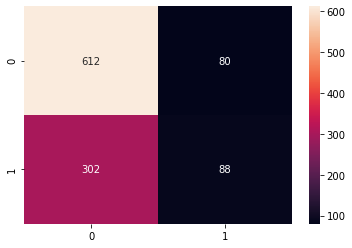

In [450]:
conf = confusion_matrix(y_test,y_pred_dt)
sns.heatmap(conf,annot=True,fmt='d')

# Support Vector Machines

In [442]:
svc_poly = SVC(kernel='poly',degree=6).fit(x_train,y_train)
y_pred_svc_poly = svc_poly.predict(x_test)
print('acc svc poly = {}'.format(accuracy_score(y_test,y_pred_svc_poly)*100))
print('Precision svc poly = {}'.format(precision_score(y_test,y_pred_svc_poly)))
print('Recall svc poly = {}'.format(recall_score(y_test,y_pred_svc_poly)))
print('f1 svc poly = {}'.format(f1_score(y_test,y_pred_svc_poly)))

acc svc poly = 67.00554528650648
Precision svc poly = 0.6153846153846154
Recall svc poly = 0.22564102564102564
f1 svc poly = 0.3302063789868668


<AxesSubplot:>

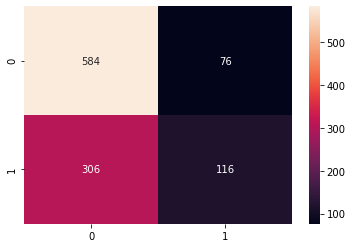

In [286]:
conf = confusion_matrix(y_test,y_pred_svc_poly)
sns.heatmap(conf,annot=True,fmt='d')

# Random Forest Classifier

In [444]:
rf = RandomForestClassifier(criterion='gini',max_depth=10, random_state=0).fit(x_train,y_train)
y_pred_rf = rf.predict(x_test) 
print('acc rf = {}'.format(accuracy_score(y_test,y_pred_rf)*100))
print('Precision rf = {}'.format(precision_score(y_test,y_pred_rf)))
print('Recall rf = {}'.format(recall_score(y_test,y_pred_rf)))
print('f1 rf = {}'.format(f1_score(y_test,y_pred_rf)))

acc rf = 68.02218114602587
Precision rf = 0.6571428571428571
Recall rf = 0.2358974358974359
f1 rf = 0.3471698113207547


<AxesSubplot:>

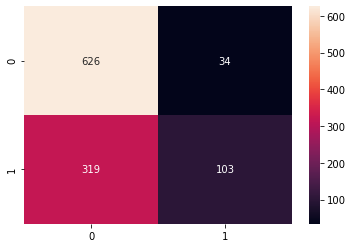

In [288]:
conf = confusion_matrix(y_test,y_pred_rf)
sns.heatmap(conf,annot=True,fmt='d')

# Ensembling

In [449]:
from sklearn.ensemble import VotingClassifier
clf1=DecisionTreeClassifier()
clf2=SVC()
clf3=RandomForestClassifier()

eclf1=VotingClassifier(estimators=[('Decision Tree Classifier', clf1), ('SVM', clf2), ('RFC', clf3)], voting='hard')
eclf1.fit(x_train, y_train)
predictions=eclf1.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test, predictions)*100)
print("Precision Score:", precision_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print("f1 score:", f1_score(y_test, predictions))

Accuracy Score: 66.6358595194085
Precision Score: 0.5767195767195767
Recall: 0.2794871794871795
f1 score: 0.3765112262521589


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
y=['Accuracy Score','Precision Score', 'Accuracy (60:40)', 'Accuracy (50:50)']
 
# getting values against each value of y
x=[acc1, acc2, acc3, acc4]
plt.bar(y, x)
 
# setting label of y-axis
plt.ylabel("Tuning Parameters", fontweight='bold', color = 'black', fontsize='20')
 
# setting label of x-axis
plt.xlabel("Accuracy", fontweight='bold', color = 'black', fontsize='20')
plt.title("Accuracy on changing train, test ratio in SVC", fontweight='bold', color = 'red', fontsize='24')
plt.show()

# Hyperparameter Tuning

## Tuning Decision Tree

In [460]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
x_scaling = StandardScaler().fit_transform(x)

### Changing train, test ratio to analyse change in accuracy

In [461]:
x_train, x_test, y_train, y_test = train_test_split(x_scaling, y, test_size=0.2)
t1=DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0).fit(x_train,y_train)
y_pred_t1 = t1.predict(x_test)
dtacc1=accuracy_score(y_test,y_pred_t1)*100
dtacc1

58.993902439024396

In [462]:
x_train, x_test, y_train, y_test = train_test_split(x_scaling, y, test_size=0.3)
t2=DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0).fit(x_train,y_train)
y_pred_t2 = t2.predict(x_test)
dtacc2=accuracy_score(y_test,y_pred_t2)*100
dtacc2

62.05493387589013

In [463]:
x_train, x_test, y_train, y_test = train_test_split(x_scaling, y, test_size=0.4)
t3=DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0).fit(x_train,y_train)
y_pred_t3 = t3.predict(x_test)
dtacc3=accuracy_score(y_test,y_pred_t3)*100
dtacc3

63.310450038138825

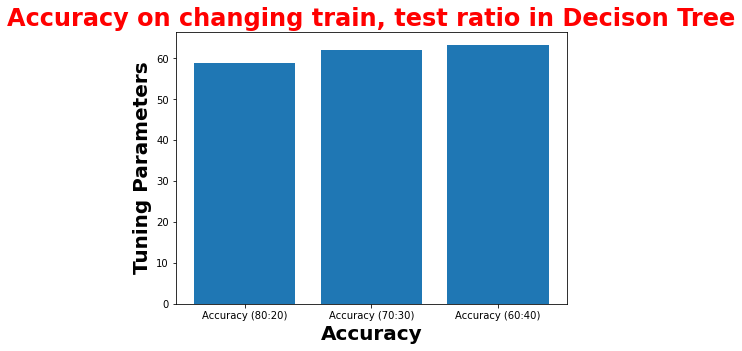

In [464]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
y=['Accuracy (80:20)','Accuracy (70:30)', 'Accuracy (60:40)']
 
# getting values against each value of y
x=[dtacc1, dtacc2, dtacc3]
plt.bar(y, x)
 
# setting label of y-axis
plt.ylabel("Tuning Parameters", fontweight='bold', color = 'black', fontsize='20')
 
# setting label of x-axis
plt.xlabel("Accuracy", fontweight='bold', color = 'black', fontsize='20')
plt.title("Accuracy on changing train, test ratio in Decison Tree", fontweight='bold', color = 'red', fontsize='24')
plt.show()

### Changing the parameter: criterion- entropy, gini

In [465]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
x_scaling = StandardScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaling, y, test_size=0.3)

In [466]:
hp1=DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0).fit(x_train,y_train)
y_pred_hp1 = hp1.predict(x_test)
print('Accuracy using ID3 = {}'.format(accuracy_score(y_test,y_pred_hp1)*100))

Accuracy using ID3 = 63.58087487283826


In [467]:
hp2=DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0).fit(x_train,y_train)
y_pred_hp2 = dt.predict(x_test)
print('Accuracy using CART = {}'.format(accuracy_score(y_test,y_pred_hp2)*100))

Accuracy using CART = 64.08952187182095


### Changing the parameter: splitter-best, random

In [298]:
hp3=DecisionTreeClassifier(criterion='entropy',splitter='best', max_depth=3, random_state=0).fit(x_train,y_train)
y_pred_hp3 = hp3.predict(x_test)
print('Accuracy using ID3 with best splitter = {}'.format(accuracy_score(y_test,y_pred_hp3)*100))

Accuracy using ID3 with best splitter = 62.4618514750763


In [299]:
hp4=DecisionTreeClassifier(criterion='entropy',splitter='random', max_depth=3, random_state=0).fit(x_train,y_train)
y_pred_hp4 = hp4.predict(x_test)
print('Accuracy using ID3 with random splitter = {}'.format(accuracy_score(y_test,y_pred_hp4)*100))

Accuracy using ID3 with random splitter = 60.32553407934893


In [300]:
hp5=DecisionTreeClassifier(criterion='gini',splitter='best', max_depth=3, random_state=0).fit(x_train,y_train)
y_pred_hp5 = hp5.predict(x_test)
print('Accuracy using CART with best splitter  = {}'.format(accuracy_score(y_test,y_pred_hp5)*100))

Accuracy using CART with best splitter  = 62.4618514750763


In [301]:
hp6=DecisionTreeClassifier(criterion='gini',splitter='random', max_depth=3, random_state=0).fit(x_train,y_train)
y_pred_hp6 = hp6.predict(x_test)
print('Accuracy using CART with random splitter  = {}'.format(accuracy_score(y_test,y_pred_hp6)*100))

Accuracy using CART with random splitter  = 59.91861648016277


### Changing the parameter: max_depth

In [302]:
hp7=DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0).fit(x_train,y_train)
y_pred_hp7 = hp7.predict(x_test)
print('Accuracy using ID3 with max_depth 4 = {}'.format(accuracy_score(y_test,y_pred_hp7)*100))

Accuracy using ID3 with max_depth 4 = 62.86876907426247


In [303]:
hp8=DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0).fit(x_train,y_train)
y_pred_hp8 = hp8.predict(x_test)
print('Accuracy using ID3 with max_depth 5 = {}'.format(accuracy_score(y_test,y_pred_hp8)*100))

Accuracy using ID3 with max_depth 5 = 62.360122075279754


In [304]:
hp9=DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0).fit(x_train,y_train)
y_pred_hp9 = hp9.predict(x_test)
print('Accuracy using ID3 with max_depth 6 = {}'.format(accuracy_score(y_test,y_pred_hp9)*100))

Accuracy using ID3 with max_depth 6 = 62.76703967446592


In [305]:
hp10=DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0).fit(x_train,y_train)
y_pred_hp10 = hp10.predict(x_test)
print('Accuracy using CART with max_depth 4 = {}'.format(accuracy_score(y_test,y_pred_hp10)*100))

Accuracy using CART with max_depth 4 = 63.68260427263479


In [306]:
hp11=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0).fit(x_train,y_train)
y_pred_hp11 = hp11.predict(x_test)
print('Accuracy using CART with max_depth 5 = {}'.format(accuracy_score(y_test,y_pred_hp11)*100))

Accuracy using CART with max_depth 5 = 61.953204476093596


In [307]:
hp12=DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=0).fit(x_train,y_train)
y_pred_hp12 = hp12.predict(x_test)
print('Accuracy using CART with max_depth 6 = {}'.format(accuracy_score(y_test,y_pred_hp12)*100))

Accuracy using CART with max_depth 6 = 62.156663275686675


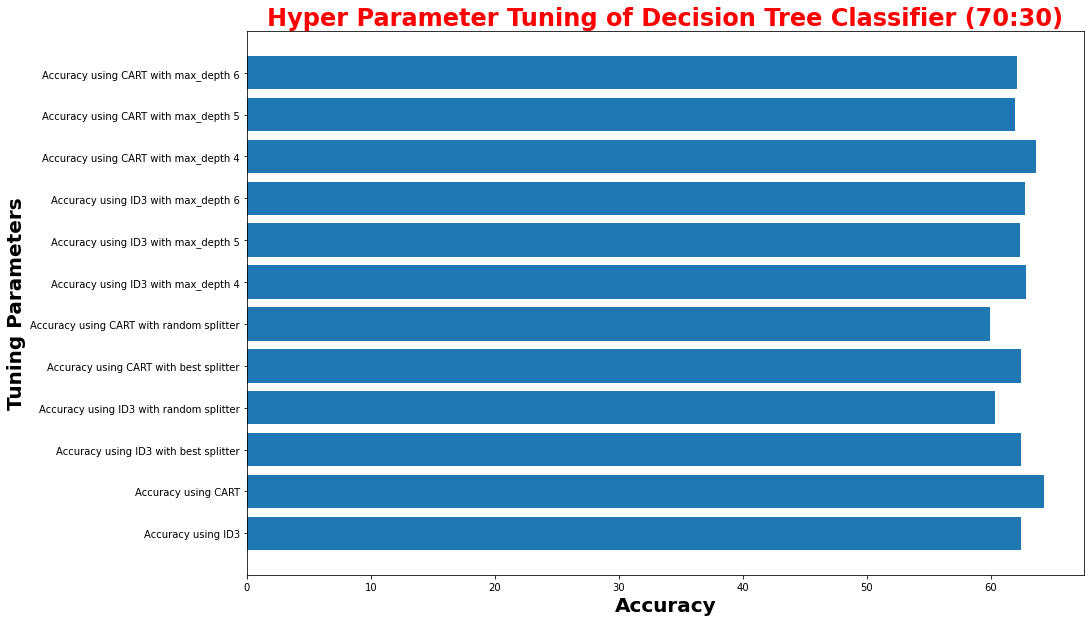

In [308]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
y=['Accuracy using ID3',
   'Accuracy using CART',
   'Accuracy using ID3 with best splitter',
   'Accuracy using ID3 with random splitter',
   'Accuracy using CART with best splitter',
   'Accuracy using CART with random splitter',
   'Accuracy using ID3 with max_depth 4',
   'Accuracy using ID3 with max_depth 5',
   'Accuracy using ID3 with max_depth 6',
   'Accuracy using CART with max_depth 4',
   'Accuracy using CART with max_depth 5',
   'Accuracy using CART with max_depth 6']
 
# getting values against each value of y
x=[accuracy_score(y_test,y_pred_hp1)*100,
  accuracy_score(y_test,y_pred_hp2)*100,
  accuracy_score(y_test,y_pred_hp3)*100,
  accuracy_score(y_test,y_pred_hp4)*100,
  accuracy_score(y_test,y_pred_hp5)*100,
  accuracy_score(y_test,y_pred_hp6)*100,
  accuracy_score(y_test,y_pred_hp7)*100,
  accuracy_score(y_test,y_pred_hp8)*100,
  accuracy_score(y_test,y_pred_hp9)*100,
  accuracy_score(y_test,y_pred_hp10)*100,
  accuracy_score(y_test,y_pred_hp11)*100,
  accuracy_score(y_test,y_pred_hp12)*100]
plt.barh(y, x)
 
# setting label of y-axis
plt.ylabel("Tuning Parameters", fontweight='bold', color = 'black', fontsize='20')
 
# setting label of x-axis
plt.xlabel("Accuracy", fontweight='bold', color = 'black', fontsize='20')
plt.title("Hyper Parameter Tuning of Decision Tree Classifier (70:30)", fontweight='bold', color = 'red', fontsize='24')
plt.show()

## Tuning Support Vector Machine

In [351]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
x_scaling = StandardScaler().fit_transform(x)

### Changing the train, test ratio to analyse accuracy

In [362]:
x_train, x_test, y_train, y_test = train_test_split(x_scaling, y, test_size=0.2)
svc_rbf = SVC(kernel='rbf',degree=6).fit(x_train,y_train)
y_pred_svc_rbf = svc_rbf.predict(x_test)
svm1=accuracy_score(y_test,y_pred_svc_rbf)
acc1=svm1*100
acc1

70.1219512195122

In [363]:
x_train, x_test, y_train, y_test = train_test_split(x_scaling, y, test_size=0.3)
svc_rbf = SVC(kernel='rbf',degree=6).fit(x_train,y_train)
y_pred_svc_rbf = svc_rbf.predict(x_test)
svm2=accuracy_score(y_test,y_pred_svc_rbf)
acc2=svm2*100
acc2

67.1414038657172

In [364]:
x_train, x_test, y_train, y_test = train_test_split(x_scaling, y, test_size=0.4)
svc_rbf = SVC(kernel='rbf',degree=6).fit(x_train,y_train)
y_pred_svc_rbf = svc_rbf.predict(x_test)
svm3=accuracy_score(y_test,y_pred_svc_rbf)
acc3=svm3*100
acc3

66.81922196796339

In [365]:
x_train, x_test, y_train, y_test = train_test_split(x_scaling, y, test_size=0.5)
svc_rbf = SVC(kernel='rbf',degree=6).fit(x_train,y_train)
y_pred_svc_rbf = svc_rbf.predict(x_test)
svm4=accuracy_score(y_test,y_pred_svc_rbf)
acc4=svm4*100
acc4

65.56776556776556

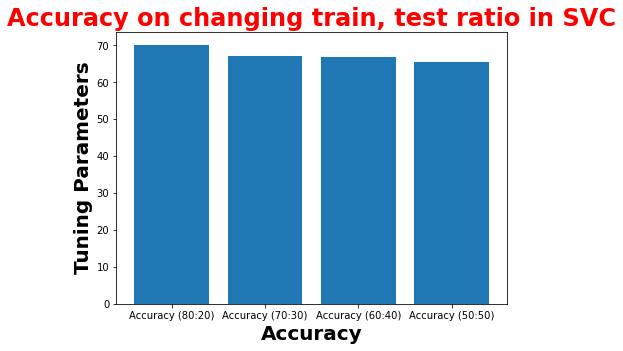

In [416]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
y=['Accuracy (80:20)','Accuracy (70:30)', 'Accuracy (60:40)', 'Accuracy (50:50)']
 
# getting values against each value of y
x=[acc1, acc2, acc3, acc4]
plt.bar(y, x)
 
# setting label of y-axis
plt.ylabel("Tuning Parameters", fontweight='bold', color = 'black', fontsize='20')
 
# setting label of x-axis
plt.xlabel("Accuracy", fontweight='bold', color = 'black', fontsize='20')
plt.title("Accuracy on changing train, test ratio in SVC", fontweight='bold', color = 'red', fontsize='24')
plt.show()

### Changing Kernels - rbf, poly, linear, sigmoid

In [324]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
x_scaling = StandardScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaling, y, test_size=0.33)

In [325]:
svc_rbf = SVC(kernel='rbf',degree=6).fit(x_train,y_train)
y_pred_svc_rbf = svc_rbf.predict(x_test)
print('acc svc rbf = {}'.format(accuracy_score(y_test,y_pred_svc_rbf)*100))

acc svc rbf = 68.8539741219963


In [326]:
svc_poly = SVC(kernel='poly',degree=6).fit(x_train,y_train)
y_pred_svc_poly = svc_poly.predict(x_test)
print('acc svc poly = {}'.format(accuracy_score(y_test,y_pred_svc_poly)*100))

acc svc poly = 66.26617375231054


In [327]:
svc_linear = SVC(kernel='linear',degree=6).fit(x_train,y_train)
y_pred_svc_linear = svc_linear.predict(x_test)
print('acc svc linear = {}'.format(accuracy_score(y_test,y_pred_svc_linear)*100))

acc svc linear = 62.1996303142329


In [328]:
svc_sigmoid = SVC(kernel='sigmoid',degree=6).fit(x_train,y_train)
y_pred_svc_sigmoid = svc_sigmoid.predict(x_test)
print('acc svc sigmoid = {}'.format(accuracy_score(y_test,y_pred_svc_sigmoid)*100))

acc svc sigmoid = 52.957486136783736


### Changing degree of poly kernel

In [329]:
svc_poly_d3 = SVC(kernel='poly',degree=3).fit(x_train,y_train)
y_pred_svc_poly_d3 = svc_poly_d3.predict(x_test)
print('acc svc poly degree 3 = {}'.format(accuracy_score(y_test,y_pred_svc_poly_d3)*100))

acc svc poly degree 3 = 63.67837338262476


In [330]:
svc_poly_d4 = SVC(kernel='poly',degree=4).fit(x_train,y_train)
y_pred_svc_poly_d4 = svc_poly_d4.predict(x_test)
print('acc svc poly degree 4 = {}'.format(accuracy_score(y_test,y_pred_svc_poly_d4)*100))

acc svc poly degree 4 = 67.8373382624769


In [331]:
svc_poly_d5 = SVC(kernel='poly',degree=5).fit(x_train,y_train)
y_pred_svc_poly_d5 = svc_poly_d5.predict(x_test)
print('acc svc poly degree 5 = {}'.format(accuracy_score(y_test,y_pred_svc_poly_d5)*100))

acc svc poly degree 5 = 62.47689463955638


In [332]:
svc_poly_d6 = SVC(kernel='poly',degree=6).fit(x_train,y_train)
y_pred_svc_poly_d6 = svc_poly_d6.predict(x_test)
print('acc svc poly degree 6 = {}'.format(accuracy_score(y_test,y_pred_svc_poly_d6)*100))

acc svc poly degree 6 = 66.26617375231054


In [333]:
svc_poly_d7 = SVC(kernel='poly',degree=7).fit(x_train,y_train)
y_pred_svc_poly_d7 = svc_poly_d7.predict(x_test)
print('acc svc poly degree 7 = {}'.format(accuracy_score(y_test,y_pred_svc_poly_d7)*100))

acc svc poly degree 7 = 62.84658040665434


In [334]:
svc_poly_d8 = SVC(kernel='poly',degree=8).fit(x_train,y_train)
y_pred_svc_poly_d8 = svc_poly_d8.predict(x_test)
print('acc svc poly degree 8 = {}'.format(accuracy_score(y_test,y_pred_svc_poly_d8)*100))

acc svc poly degree 8 = 64.04805914972273


In [335]:
svc_poly_d9 = SVC(kernel='poly',degree=9).fit(x_train,y_train)
y_pred_svc_poly_d9 = svc_poly_d9.predict(x_test)
print('acc svc poly degree 9 = {}'.format(accuracy_score(y_test,y_pred_svc_poly_d9)*100))

acc svc poly degree 9 = 63.03142329020333


### Changing degree of rbf kernel

In [370]:
svc_rbf_d4 = SVC(kernel='rbf',degree=4).fit(x_train,y_train)
y_pred_svc_rbf_d4 = svc_rbf_d4.predict(x_test)
print('acc svc rbf with degree 4 = {}'.format(accuracy_score(y_test,y_pred_svc_rbf_d4)*100))

acc svc rbf with degree 4 = 65.56776556776556


In [371]:
svc_rbf_d5 = SVC(kernel='rbf',degree=5).fit(x_train,y_train)
y_pred_svc_rbf_d5 = svc_rbf_d5.predict(x_test)
print('acc svc rbf with degree 5 = {}'.format(accuracy_score(y_test,y_pred_svc_rbf_d5)*100))

acc svc rbf with degree 5 = 65.56776556776556


In [372]:
svc_rbf_d6 = SVC(kernel='rbf',degree=6).fit(x_train,y_train)
y_pred_svc_rbf_d6 = svc_rbf_d6.predict(x_test)
print('acc svc rbf with degree 6 = {}'.format(accuracy_score(y_test,y_pred_svc_rbf_d6)*100))

acc svc rbf with degree 6 = 65.56776556776556


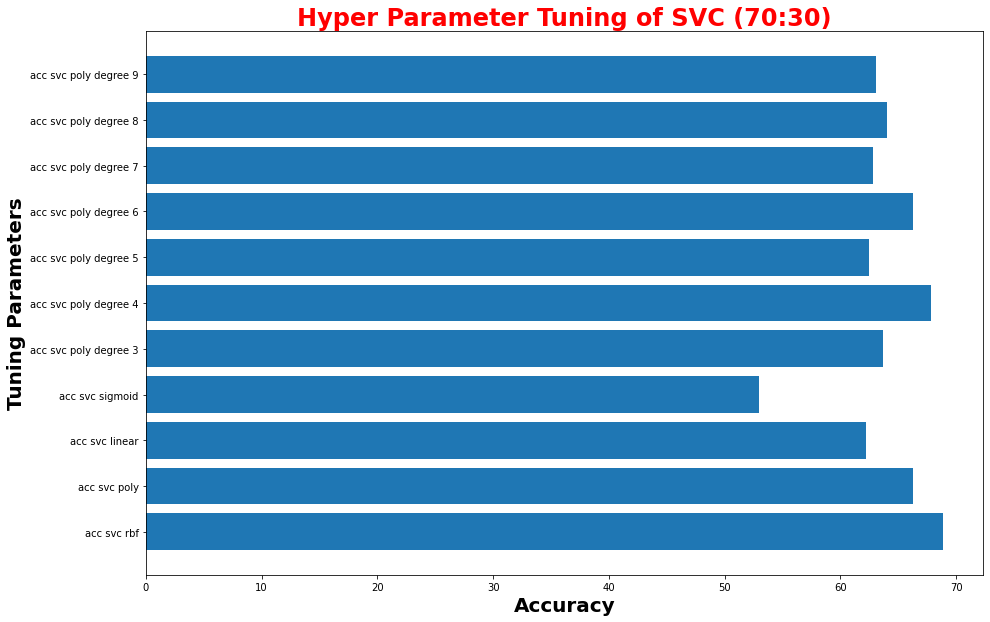

In [347]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
y=['acc svc rbf',
   'acc svc poly',
   'acc svc linear',
   'acc svc sigmoid',
   'acc svc poly degree 3',
   'acc svc poly degree 4',
   'acc svc poly degree 5',
   'acc svc poly degree 6',
   'acc svc poly degree 7',
   'acc svc poly degree 8',
   'acc svc poly degree 9'
  ]
 
# getting values against each value of y
x=[accuracy_score(y_test,y_pred_svc_rbf)*100,
   accuracy_score(y_test,y_pred_svc_poly)*100,
   accuracy_score(y_test,y_pred_svc_linear)*100,
   accuracy_score(y_test,y_pred_svc_sigmoid)*100,
   accuracy_score(y_test,y_pred_svc_poly_d3)*100,
   accuracy_score(y_test,y_pred_svc_poly_d4)*100,
   accuracy_score(y_test,y_pred_svc_poly_d5)*100,
   accuracy_score(y_test,y_pred_svc_poly_d6)*100,
   accuracy_score(y_test,y_pred_svc_poly_d7)*100,
   accuracy_score(y_test,y_pred_svc_poly_d8)*100,
   accuracy_score(y_test,y_pred_svc_poly_d9)*100
  ]
plt.barh(y, x)
 
# setting label of y-axis
plt.ylabel("Tuning Parameters", fontweight='bold', color = 'black', fontsize='20')
 
# setting label of x-axis
plt.xlabel("Accuracy", fontweight='bold', color = 'black', fontsize='20')
plt.title("Hyper Parameter Tuning of SVC (70:30)", fontweight='bold', color = 'red', fontsize='24')
plt.show()

## Tuning Random Forest Classifier

### Changing train, test ratio and observing the change in accuracy

In [407]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
x_scaling = StandardScaler().fit_transform(x)

In [408]:
x_train, x_test, y_train, y_test = train_test_split(x_scaling, y, test_size=0.2)
rf = RandomForestClassifier(criterion='gini',max_depth=10, random_state=0).fit(x_train,y_train)
y_pred_rf = rf.predict(x_test) 
rfacc1=accuracy_score(y_test,y_pred_rf)*100
rfacc1

66.3109756097561

In [409]:
x_train, x_test, y_train, y_test = train_test_split(x_scaling, y, test_size=0.3)
rf = RandomForestClassifier(criterion='gini',max_depth=10, random_state=0).fit(x_train,y_train)
y_pred_rf = rf.predict(x_test) 
rfacc2=accuracy_score(y_test,y_pred_rf)*100
rfacc2

64.80162767039674

In [410]:
x_train, x_test, y_train, y_test = train_test_split(x_scaling, y, test_size=0.4)
rf = RandomForestClassifier(criterion='gini',max_depth=10, random_state=0).fit(x_train,y_train)
y_pred_rf = rf.predict(x_test) 
rfacc3=accuracy_score(y_test,y_pred_rf)*100
rfacc3

66.28527841342486

In [411]:
x_train, x_test, y_train, y_test = train_test_split(x_scaling, y, test_size=0.5)
rf = RandomForestClassifier(criterion='gini',max_depth=10, random_state=0).fit(x_train,y_train)
y_pred_rf = rf.predict(x_test) 
rfacc4=accuracy_score(y_test,y_pred_rf)*100
rfacc4

65.995115995116

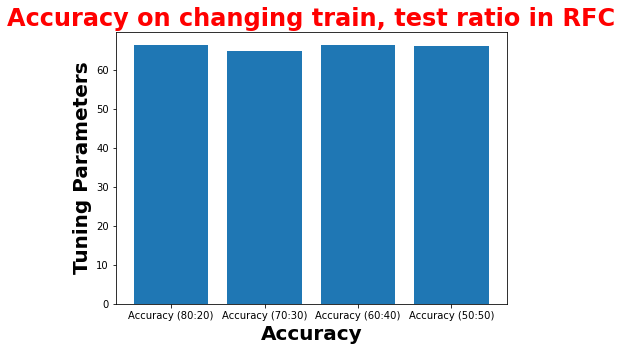

In [415]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
y=['Accuracy (80:20)','Accuracy (70:30)', 'Accuracy (60:40)', 'Accuracy (50:50)']
 
# getting values against each value of y
x=[rfacc1, rfacc2, rfacc3, rfacc4]
plt.bar(y, x)
 
# setting label of y-axis
plt.ylabel("Tuning Parameters", fontweight='bold', color = 'black', fontsize='20')
 
# setting label of x-axis
plt.xlabel("Accuracy", fontweight='bold', color = 'black', fontsize='20')
plt.title("Accuracy on changing train, test ratio in RFC", fontweight='bold', color = 'red', fontsize='24')
plt.show()

### Changing the parameters to observe its effect on accuracy of the model

In [468]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
x_scaling = StandardScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaling, y, test_size=0.3)

#### Changing the criterion parameter: gini and entropy

In [469]:
rf = RandomForestClassifier(criterion='gini',max_depth=10, random_state=0).fit(x_train,y_train)
y_pred_rf1 = rf.predict(x_test) 
print('acc rf with criterion: gini index = {}'.format(accuracy_score(y_test,y_pred_rf1)*100))

acc rf = 65.81892166836215


In [470]:
rf = RandomForestClassifier(criterion='entropy',max_depth=10, random_state=0).fit(x_train,y_train)
y_pred_rf2 = rf.predict(x_test) 
print('acc rf with criterion: entropy = {}'.format(accuracy_score(y_test,y_pred_rf2)*100))

acc rf with criterion: entropy = 66.53102746693794


#### Changing the max depth of the tree and analysing the accuracy

In [472]:
rf = RandomForestClassifier(criterion='gini',max_depth=15, random_state=0).fit(x_train,y_train)
y_pred_rf3 = rf.predict(x_test) 
print('acc rf with gini and depth:15 = {}'.format(accuracy_score(y_test,y_pred_rf3)*100))

acc rf with gini and depth:15 = 65.92065106815869


In [473]:
rf = RandomForestClassifier(criterion='gini',max_depth=20, random_state=0).fit(x_train,y_train)
y_pred_rf4 = rf.predict(x_test) 
print('acc rf with gini and depth: 20 = {}'.format(accuracy_score(y_test,y_pred_rf4)*100))

acc rf with gini and depth: 20 = 66.32756866734486


In [474]:
rf = RandomForestClassifier(criterion='gini',max_depth=25, random_state=0).fit(x_train,y_train)
y_pred_rf5 = rf.predict(x_test) 
print('acc rf with gini and depth: 25 = {}'.format(accuracy_score(y_test,y_pred_rf5)*100))

acc rf with gini and depth: 25 = 66.4292980671414


In [475]:
rf = RandomForestClassifier(criterion='gini',max_depth=30, random_state=0).fit(x_train,y_train)
y_pred_rf6 = rf.predict(x_test) 
print('acc rf with gini and depth: 30 = {}'.format(accuracy_score(y_test,y_pred_rf6)*100))

acc rf with gini and depth: 30 = 66.63275686673448


In [477]:
rf = RandomForestClassifier(criterion='entropy',max_depth=35, random_state=0).fit(x_train,y_train)
y_pred_rf7 = rf.predict(x_test) 
print('acc rf with gini and depth: 35 = {}'.format(accuracy_score(y_test,y_pred_rf7)*100))

acc rf with gini and depth: 35 = 66.12410986775178


In [478]:
rf = RandomForestClassifier(criterion='entropy',max_depth=15, random_state=0).fit(x_train,y_train)
y_pred_rf8 = rf.predict(x_test) 
print('acc rf with entropy and depth:15 = {}'.format(accuracy_score(y_test,y_pred_rf8)*100))

acc rf with entropy and depth:15 = 66.32756866734486


In [479]:
rf = RandomForestClassifier(criterion='entropy',max_depth=20, random_state=0).fit(x_train,y_train)
y_pred_rf9 = rf.predict(x_test) 
print('acc rf with entropy and depth: 20 = {}'.format(accuracy_score(y_test,y_pred_rf9)*100))

acc rf with entropy and depth: 20 = 66.02238046795524


In [480]:
rf = RandomForestClassifier(criterion='entropy',max_depth=25, random_state=0).fit(x_train,y_train)
y_pred_rf10 = rf.predict(x_test) 
print('acc rf with entropy and depth: 25 = {}'.format(accuracy_score(y_test,y_pred_rf10)*100))

acc rf with entropy and depth: 25 = 66.73448626653102


In [481]:
rf = RandomForestClassifier(criterion='entropy',max_depth=30, random_state=0).fit(x_train,y_train)
y_pred_rf11 = rf.predict(x_test) 
print('acc rf with entropy and depth: 30 = {}'.format(accuracy_score(y_test,y_pred_rf11)*100))

acc rf with entropy and depth: 30 = 67.54832146490337


In [482]:
rf = RandomForestClassifier(criterion='entropy',max_depth=35, random_state=0).fit(x_train,y_train)
y_pred_rf12 = rf.predict(x_test) 
print('acc rf with entropy and depth: 35 = {}'.format(accuracy_score(y_test,y_pred_rf12)*100))

acc rf with entropy and depth: 35 = 66.12410986775178


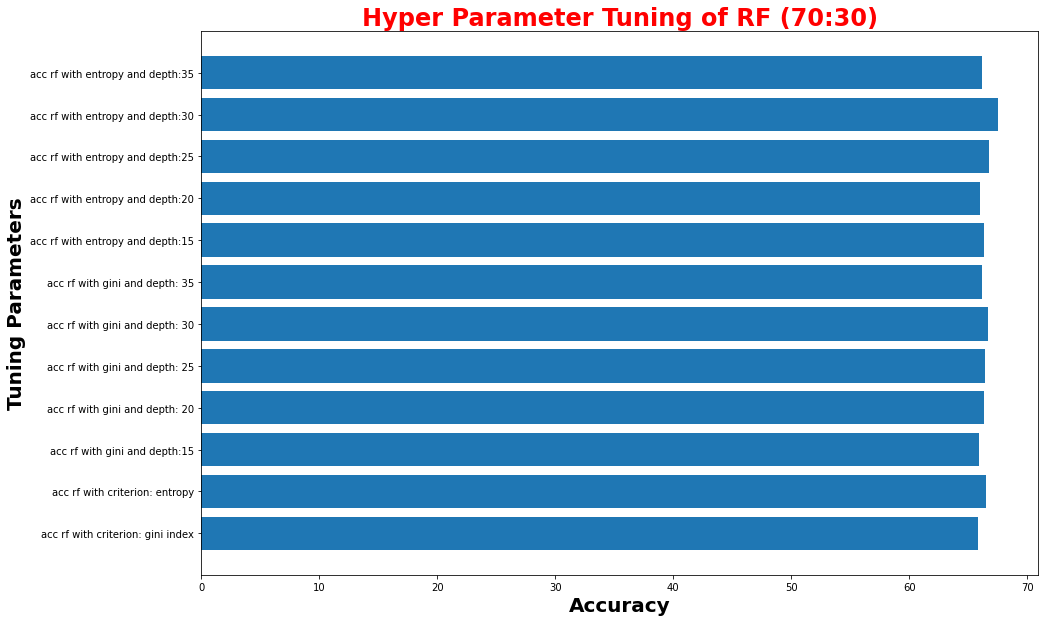

In [484]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
y=['acc rf with criterion: gini index',
   'acc rf with criterion: entropy',
   'acc rf with gini and depth:15',
   'acc rf with gini and depth: 20',
   'acc rf with gini and depth: 25',
   'acc rf with gini and depth: 30',
   'acc rf with gini and depth: 35',
   'acc rf with entropy and depth:15',
   'acc rf with entropy and depth:20',
   'acc rf with entropy and depth:25',
   'acc rf with entropy and depth:30',
   'acc rf with entropy and depth:35'
  ]
 
# getting values against each value of y
x=[accuracy_score(y_test,y_pred_rf1)*100,
   accuracy_score(y_test,y_pred_rf2)*100,
   accuracy_score(y_test,y_pred_rf3)*100,
   accuracy_score(y_test,y_pred_rf4)*100,
   accuracy_score(y_test,y_pred_rf5)*100,
   accuracy_score(y_test,y_pred_rf6)*100,
   accuracy_score(y_test,y_pred_rf7)*100,
   accuracy_score(y_test,y_pred_rf8)*100,
   accuracy_score(y_test,y_pred_rf9)*100,
   accuracy_score(y_test,y_pred_rf10)*100,
   accuracy_score(y_test,y_pred_rf11)*100,
   accuracy_score(y_test,y_pred_rf12)*100
  ]
plt.barh(y, x)
 
# setting label of y-axis
plt.ylabel("Tuning Parameters", fontweight='bold', color = 'black', fontsize='20')
 
# setting label of x-axis
plt.xlabel("Accuracy", fontweight='bold', color = 'black', fontsize='20')
plt.title("Hyper Parameter Tuning of RF (70:30)", fontweight='bold', color = 'red', fontsize='24')
plt.show()